https://selenium-python.readthedocs.io

Download the related browser driver. We prefer Chrome web driver. Then add the exe's path into Environment Variables > Path section. Chrome :

In [307]:
import pandas as pd
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.common.keys import Keys
import time
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [308]:
# create a browser 
browser = webdriver.Chrome()

### Login Twitter

In [309]:
url = "https://twitter.com/i/flow/login"

In [310]:
# open the url in the browser
browser.get(url)
time.sleep(5)

To get the path of username section,
Go to username section, right click then "Inspect" ,
Right click on the element code > copy > copy as path

In [311]:
# Get the element's path for username section
username = browser.find_element(By.XPATH, '//*[@id="layers"]/div/div/div/div/div/div/div[2]/div[2]/div/div/div[2]/div[2]/div[1]/div/div/div[5]/label/div/div[2]/div/input')

In [312]:
# send the username to the twitter
username.send_keys('username')

In [313]:
# Get the path of "Continue" button and write here. Then click the button
cont_button = browser.find_element(By.XPATH,'//*[@id="layers"]/div/div/div/div/div/div/div[2]/div[2]/div/div/div[2]/div[2]/div[1]/div/div/div[6]/div' )
cont_button.click()
time.sleep(5)

In [315]:
# Get the element's path for password section 
password = browser.find_element(By.XPATH, '//*[@id="layers"]/div/div/div/div/div/div/div[2]/div[2]/div/div/div[2]/div[2]/div[1]/div/div/div[3]/div/label/div/div[2]/div[1]/input' )

In [316]:
# send the password to the twitter
password.send_keys('password')

In [317]:
# Get the path of "Login" button and Click the button.
login_button = browser.find_element(By.XPATH, '//*[@id="layers"]/div/div/div/div/div/div/div[2]/div[2]/div/div/div[2]/div[2]/div[2]/div/div[1]/div' )
login_button.click()
time.sleep(5)

### Search Hashtag and Pull Recent Tweets 

In [342]:
# Go to explore page
explore = browser.find_element(By.XPATH, '//*[@id="react-root"]/div/div/div[2]/header/div/div/div/div[1]/div[2]/nav/a[2]/div' )
explore.click()

In [357]:
# Get the path of search section
search = browser.find_element(By.XPATH, '//*[@id="react-root"]/div/div/div[2]/main/div/div/div/div[1]/div/div[1]/div[1]/div/div/div/div/div[1]/div[2]/div/div/div/form/div[1]/div/div/div/div[2]/div/input' ) 

In [358]:
# Enter the value to be searched and make it Enter command
search.send_keys('sasa hisse')
search.send_keys(Keys.RETURN)

In [359]:
# Filter the tweets in recent times.
recent_button = browser.find_element(By.XPATH, '//*[@id="react-root"]/div/div/div[2]/main/div/div/div/div[1]/div/div[1]/div[2]/nav/div/div[2]/div/div[2]/a/div/span' )
recent_button.click()
time.sleep(1)

Bir kaç tweet örneklerinin pathlerine bakıldığında sadece sayı değişiyor. Ortadaki işaretli sayı tweet sırasını, sondaki işaretli sayı ise normal tweet mi yanıt tweet mi onu temsil ediyor. Fakat scroll down edildikçe sayfa numaraları refreshleyip aynı numarayı atıyor. 

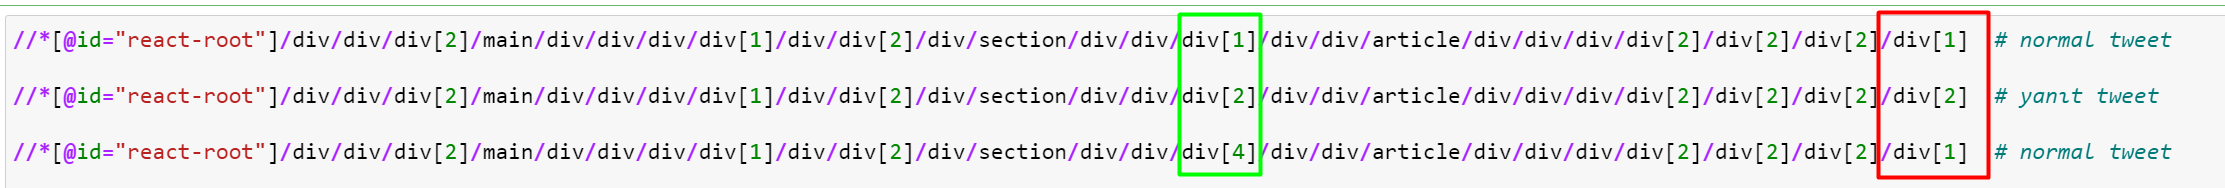

In [360]:
# Normal Tweet example by Path
path = '//*[@id="react-root"]/div/div/div[2]/main/div/div/div/div[1]/div/div[2]/div/section/div/div/div[10]/div/div/article/div/div/div/div[2]/div[2]/div[2]/div[1]'
tweet = browser.find_element(By.XPATH, path ) 
tweet.text

'Bir şimdi sasaya herkes sasa konuşuruz twterda ,ben söyledikten sonra herkes al verir kardeş ,yeterki gözümden kaçmasın ,yeterki göreyim .\nTek hisse üstünden para kazanmak mümkün mü evet işi bilen adama evet \nAma ben yumurtaları aynı sepete koymam'

In [364]:
# Answer Tweet example by Path
path = '//*[@id="react-root"]/div/div/div[2]/main/div/div/div/div[1]/div/div[2]/div/section/div/div/div[2]/div/div/article/div/div/div/div[2]/div[2]/div[2]/div[2]'
tweet = browser.find_element(By.XPATH, path ) 
tweet.text

'Sanki falciya bal bakarmisiniz gibi sordum ama.bakiyorsaniz bir hisse soracam.sasa.'

In [365]:
# Scroll Down Commands. It will scroll down until reach the bottom. Take tweets for each scroll down refresh.
tweet_list = []

lenOfPage = browser.execute_script("window.scrollTo(0, document.body.scrollHeight);var lenOfPage=document.body.scrollHeight;return lenOfPage;")
match=False
while(match==False):
    lastCount = lenOfPage
    time.sleep(1)
    
    # Pull the normal tweets for each scroll down 
    for i in range(1,25):
        path = '//*[@id="react-root"]/div/div/div[2]/main/div/div/div/div[1]/div/div[2]/div/section/div/div/div[{0}]/div/div/article/div/div/div/div[2]/div[2]/div[2]/div[1]'.format(i)
        try: 
            tweet = browser.find_elements(By.XPATH, path )
            for element in tweet:
                tweet_list.append(element.text)
        except : 
            pass
    
    time.sleep(5)    
    lenOfPage = browser.execute_script("window.scrollTo(0, document.body.scrollHeight);var lenOfPage=document.body.scrollHeight;return lenOfPage;")
    if lastCount == lenOfPage:
        match=True

In [366]:
# Removing the answer tweets' headlines
tweet_list = [x for x in tweet_list if "yanıt olarak" not in x]
tweet_list

['#SASA POLYESTER | Hisse Senedi Yorumu | Borsa Temel ve Teknik Analizi 18.03\n\nhttps://youtu.be/WNiHvJ_EbVc',
 'Bir şimdi sasaya herkes sasa konuşuruz twterda ,ben söyledikten sonra herkes al verir kardeş ,yeterki gözümden kaçmasın ,yeterki göreyim .\nTek hisse üstünden para kazanmak mümkün mü evet işi bilen adama evet \nAma ben yumurtaları aynı sepete koymam',
 '#KapitalTrader hisse önerilerimin özeti:\nMart başından beri %100 hit rasyo ile gidiyoruz. 2 pozisyonumuz açık hala (#BTCIM ve #SASA). 10 gündür kapadıklarımızın ortalama  hisse başı karı %4,4 oldu.\n#thyao #petkm #odas #odas #otkar #sasa\n\n#bist #dolar #EREGL #motorin #TCMB #RUSYA',
 'Günün En çok kazandıran 5 hissesi belli oldu.\n\nENKAI\nZRGYO\nHEKTS\nALARK\nCIMSA\n\n http://investaz.com.tr/analiz/\n\n#investaz #yatırım #borsa #bist100 #thyaoa #garan #kozal #sıse #sasa #hisse #dolar #borsaistanbul #BorsaAnalizleri #ENKAI #ZRGYO #HEKTS #ALARK #CIMSA',
 "Hadi grafik bakalım , bu tweet'in altına grafiğine bakılmasını istedi